# Operações binarias e mascaras

- Operações binárias são bastante uteis para criarmos máscaras em uma imagem
- Mascaras, por sua vez, são importante para segmentação de imagens

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

- Vamos criar duas imagens para demostrar as operações

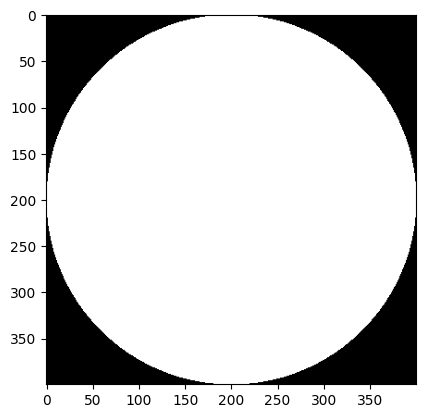

In [2]:
_temp = np.zeros((400,400,3), dtype=np.uint8)
ret = cv2.rectangle(_temp.copy(), (30,30), (370,370), (255,255,255), cv2.FILLED)
cir = cv2.circle(_temp.copy(), (200,200), 200, (255,255,255), cv2.FILLED)
plt.imshow(cir)

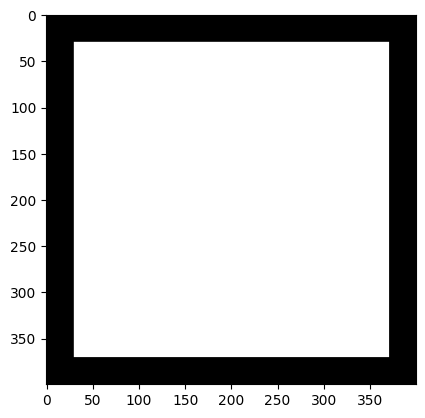

In [3]:
plt.imshow(ret)

## Bitwise AND
- Podemos fazer uma operação `and` entre duas imagems da seguinte forma:

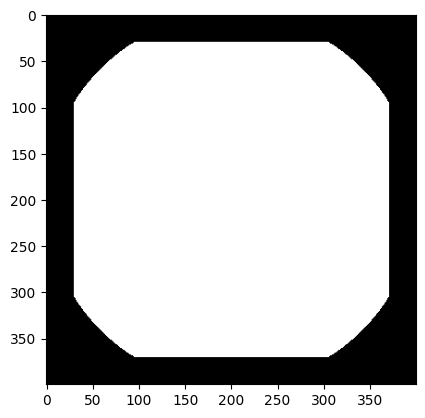

In [4]:
b_and = cv2.bitwise_and(ret, cir)
plt.imshow(b_and)

## Bitwise OR
- Podemos fazer a operação `or` entre duas imagens da seguinte forma

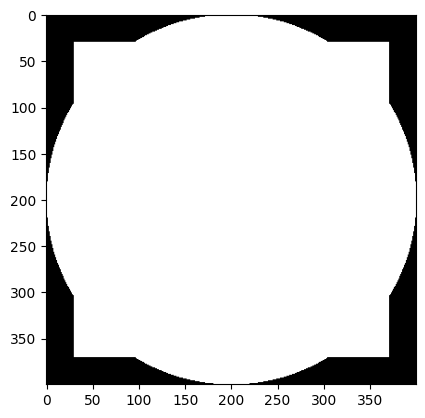

In [5]:
b_or = cv2.bitwise_or(ret, cir)
plt.imshow(b_or)

## Bitwise XOR
- Podemos fazer a operação `xor` entre duas imagens da seguinte forma

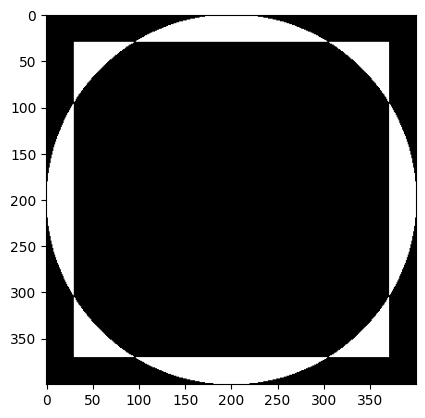

In [6]:
b_xor = cv2.bitwise_xor(ret, cir)
plt.imshow(b_xor)

## Bitwise NOT
- Podemos fazer a operação `not` de uma imagem da seguinte forma:

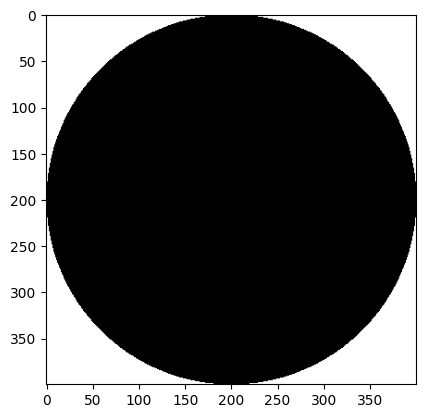

In [7]:
b_not = cv2.bitwise_not(cir)
plt.imshow(b_not)

## Criando máscaras
- Uma máscara é utilizada para selecionar uma parte de interesse de uma imagem
- Vamos carregar uma imagem para pegar a mascara dela

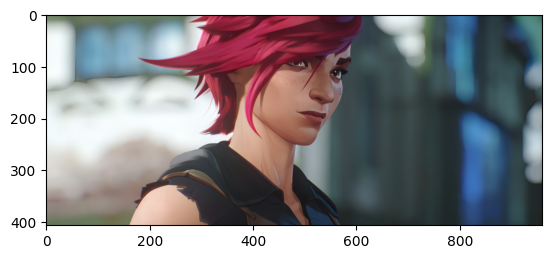

In [8]:
img_vi = cv2.cvtColor(cv2.imread("assets/vi.jpg"), cv2.COLOR_BGR2RGB)
img_vi = cv2.resize(img_vi, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
plt.imshow(img_vi)

- Criando uma máscara para pegar só o rosto

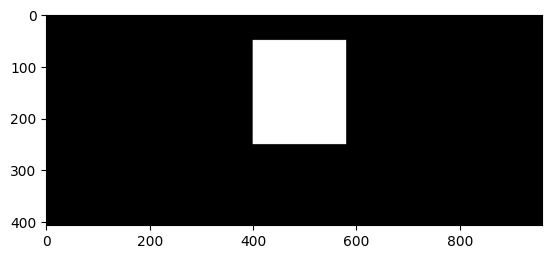

In [9]:
mask = cv2.rectangle(np.zeros_like(img_vi), (400, 50), (580, 250), (255, 255, 255), thickness=cv2.FILLED)
plt.imshow(mask)

- Agora vamos aplicar a máscara

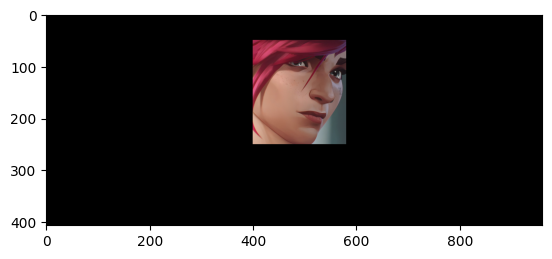

In [10]:
masked_vi = cv2.bitwise_and(img_vi, mask)
plt.imshow(masked_vi)

___
# Exercício
- Volte no exercício anterior e aplique, crie uma mascara para extrair só a placa do carro
___


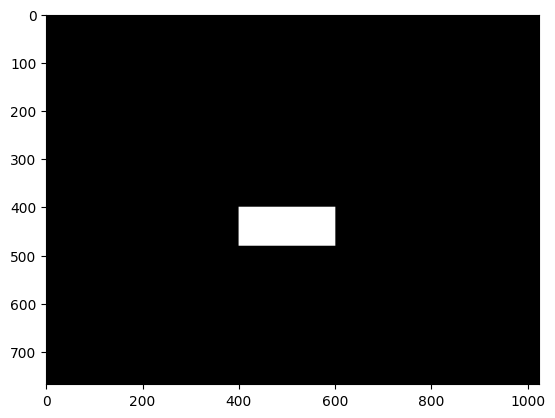

In [12]:
carro = cv2.imread("assets/carro.jpg")
carro = cv2.cvtColor(carro, cv2.COLOR_BGR2GRAY)

est = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
carro_bh = cv2.morphologyEx(carro, cv2.MORPH_BLACKHAT, est)
t, forma_bw = cv2.threshold(carro_bh, 50, 255, cv2.THRESH_BINARY)

mask = cv2.rectangle(np.zeros_like(carro_bh), (400, 400), (600, 480), (255, 255, 255), thickness=cv2.FILLED)
plt.imshow(mask, cmap="gray")

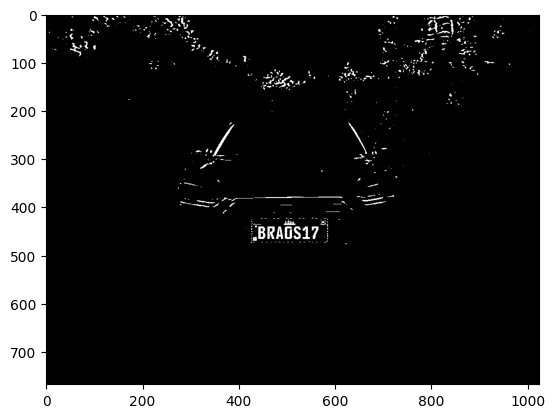

In [13]:
plt.imshow(forma_bw, cmap="gray")

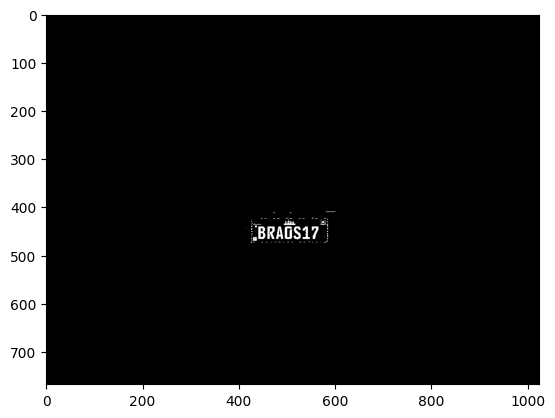

In [14]:

b_and = cv2.bitwise_and(forma_bw, mask)
plt.imshow(b_and, cmap="gray")